In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales',axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_features = polynomial_converter.transform(X)

In [10]:
X.shape

(200, 3)

In [11]:
poly_features.shape

(200, 9)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [15]:
len(X_train)

140

In [16]:
len(X_test)

60

In [17]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
predictions = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
MAE = mean_absolute_error(y_test,predictions)

In [27]:
MSE = mean_squared_error(y_test,predictions)

In [28]:
RMSE = np.sqrt(MSE)

In [33]:
df['sales'].mean()

14.0225

In [29]:
MAE

0.48967980448037096

In [30]:
MSE

0.44175055104035904

In [31]:
RMSE

0.6646431757269152

In [32]:
X_train.mean()

4655.305238095238

In [34]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

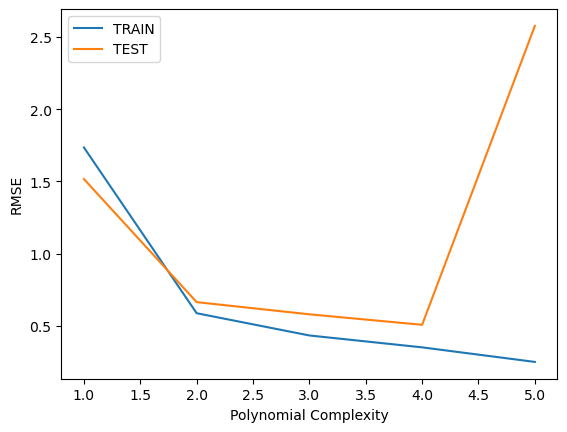

In [35]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

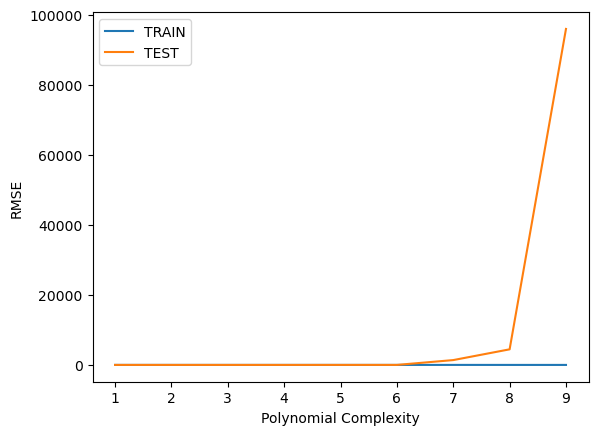

In [36]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()




In [37]:
final_ploynomial_coverter = PolynomialFeatures(degree=3,include_bias=False)

In [38]:
final_model = LinearRegression()

In [39]:
full_converted_X = final_ploynomial_coverter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [40]:
from joblib import dump,load

In [41]:
dump(final_model,'final_polynomial_model.joblib')

['final_polynomial_model.joblib']

In [44]:
dump(final_ploynomial_coverter,'final_converter.joblib')

['final_converter.joblib']

In [47]:
loaded_converter = load('final_converter.joblib')

In [45]:
loaded_model= load('final_polynomial_model.joblib')

In [46]:
campaign=[[147,22,12]]

In [50]:
transformed_data=loaded_converter.fit_transform(campaign)

In [52]:
loaded_model.predict(transformed_data)

array([14.57971537])